Naveeda Ali
<br>
Date: Mar. 13, 2024
<br>
PHYS 2030 W24

__Rubric__ (100 points total):

- Part (a) /__20 points__

- Part (b) /__30 points__

- Part (c) /__20 points__

- Part (d) /__30 points__



# <center><font color=#46769B>Exercise 9: N-body simulations</font></center>

## <font color=#46769B>Introduction: Binary stars</font>

A large fraction of stars in our galaxy form binary pairs. We will consider two equal mass stars, $m_1 = m_2 = 1 \, M_\odot$. At time $t=0$, assume they are separated by a distance $d=1 \; {\rm AU}$, with the following initial positions

$$\mathbf{r}_1(0) = (\tfrac{d}{2},0,0) \, , \quad \mathbf{r}_2(0) = (-\tfrac{d}{2},0,0) \, .$$

and initial velocities

$$\mathbf{v}_1(0) = (0,\sqrt{\tfrac{Gm}{2d}},0) \, , \quad \mathbf{v}_2(0) = (0,-\sqrt{\tfrac{Gm}{2d}},0) \, .$$

Following the lecture notes, the acceleration due to gravity is given by

$$\mathbf{a}_1(t,\mathbf{r}_1,\mathbf{r}_2) = \frac{G m_2 \mathbf{r}_{21}}{|\mathbf{r}_{21}|^3} \, , \qquad \mathbf{a}_2(t,\mathbf{r}_1,\mathbf{r}_2) = \frac{G m_1 \mathbf{r}_{12}}{|\mathbf{r}_{12}|^3} \, ,$$

where $\mathbf{r}_{12} = - \mathbf{r}_{21} = \mathbf{r}_1 - \mathbf{r}_2$. The initial velocity is chosen so that the binary stars are expected to have circular trajectories, and their exact solutions are

$$\mathbf{r}_1(t) = \left(\tfrac{d}{2} \cos(\omega t),\tfrac{d}{2}\sin(\omega t),0\right) \, , \qquad
\mathbf{r}_2(t) = -\left(\tfrac{d}{2} \cos(\omega t),\tfrac{d}{2}\sin(\omega t),0\right) \, ,$$

where the angular frequency is $\omega = \sqrt{2 G m/d^3}$.

Note the following units:

- Masses will be given in solar masses:  $1 \, M_\odot$ is the mass of the Sun.

- Distances will be given in *astronomical units* (AU), which is the Earth-Sun distance.

- Time will be given in *years*

- Velocity will be in *AU/year*, which is about 4.7 km/s.

- In these units, Newton's constant is approximately

$$G = 39.42 \; {\rm AU}^3 \, {\rm yr}^{-2} \, M_\odot^{-1}$$

The goals of this exercise are:

- Gain experience with using leapfrog methods for solving two- and three-body problems

Required reading:

- *Lesson 9: Leapfrog method*

## <font color=#46769B>Part (a): Two-body simulation</font>

Your tasks are:

- Write a code to solve for $\mathbf{r}_1(t)$ and $\mathbf{r}_2(t)$ numerically using the leapfrog method for time $t$ the range $[0,10]$. Choose a reasonable value for the number of steps $N$, but you don't need to perform a convergence test.

- Make a plot showing $x_1(t)$ and $x_2(t)$ as function of $t$ for your numerical solution.

- On the same figure, plot the exact solutions for $x_1(t)$ and $x_2(t)$ for circular motion.

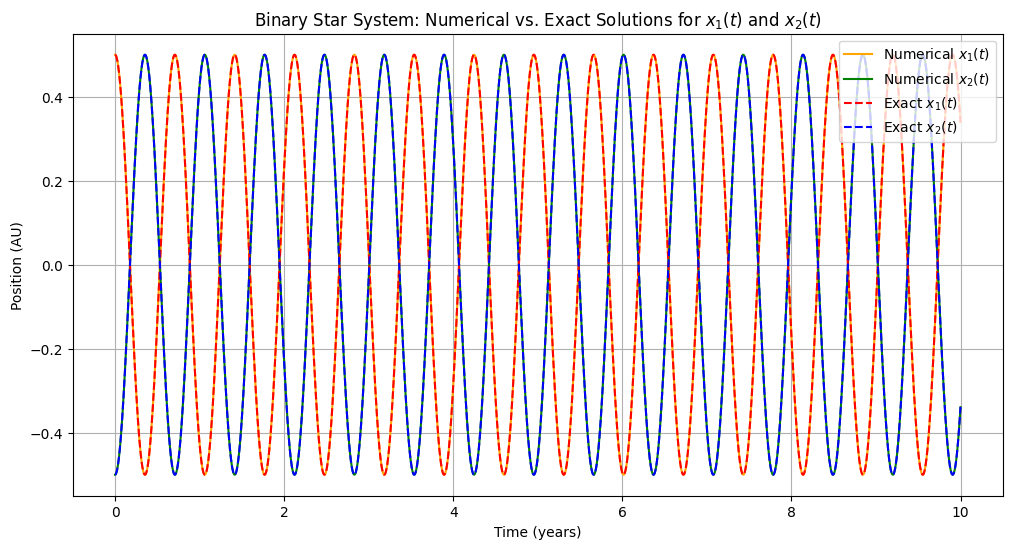

In [25]:
#Part (a)
import numpy as np
import matplotlib.pyplot as plt
#Constants
G = 39.42
m1 = m2 = 1.0
d = 1.0
t0 = 0
tf = 10
#Using angular frequency
omega = np.sqrt(G*(m1 + m2)/d**3)

#Acceleration function
def accel(r):
    r1 = r[0:3]
    r2 = r[3:6]
    r12 = r2 - r1
    mag_r12 = np.linalg.norm(r12)
    a1 = G*m2*r12 / mag_r12**3
    a2 = -G*m1*r12 / mag_r12**3
    return np.concatenate([a1, a2])

#Leapfrog integration method
def leapfrog(num_steps):
    t = np.linspace(t0, tf, num=num_steps + 1)
    h = (tf - t0) / num_steps
    r = np.zeros((num_steps + 1, 6))
    v = np.zeros((num_steps + 1, 6))

    #Initial conditions
    r[0] = [d/2, 0, 0, -d/2, 0, 0]
    v[0] = [0, np.sqrt(G *(m1+m2)/d)/2, 0, 0, -np.sqrt(G*(m1+m2)/d)/2, 0]

    for i in range(num_steps):
        v[i] += h/2* accel(r[i])  # First half kick
        r[i+1] = r[i] + h*v[i]   # Drift
        v[i+1] = v[i] + h/2* accel(r[i+1])  # Second half kick

    return r, v

num_steps = 10000
r, v = leapfrog(num_steps)

#Numerical results
x1_numerical = r[:, 0]
x2_numerical = r[:, 3]

#Time step for plot
t = np.linspace(t0, tf, num=num_steps + 1)

#Plotting the numerical answers for x1 and x2
plt.figure(figsize=(12, 6))
plt.plot(t, x1_numerical, label='Numerical $x_1(t)$', color='orange')
plt.plot(t, x2_numerical, label='Numerical $x_2(t)$', color='green')

#Plotting exact solutions
plt.plot(t, d/2 * np.cos(omega*t), 'r--', label='Exact $x_1(t)$')
plt.plot(t, -d/2 * np.cos(omega*t), 'b--', label='Exact $x_2(t)$')

plt.xlabel('Time (years)')
plt.ylabel('Position (AU)')
plt.legend(loc='upper right')
plt.title('Binary Star System: Numerical vs. Exact Solutions for $x_1(t)$ and $x_2(t)$')
plt.grid(True)
plt.show()

## <font color=#46769B>Part (b): Wandering black holes (three-body simulations)</font>

It is of great interest to know how many black holes (BHs) there are in our galaxy and throughout the Universe. BHs form at the ends of the lives of massive stars. It is also hypothesized that other BHs could potentially be leftover from the beginning of the Universe itself. However, BHs randomly wandering through our galaxy are challenging to observe, though very recently one possible object was discovered for the [first time](https://www.sciencealert.com/for-the-first-time-a-lone-black-hole-has-been-found-wandering-the-milky-way).

One possible way to constrain the existance of BHs is to study their effect on binary stars. In a nutshell, if a massive BH passes close to a binary pair, it is possible the pair can be disrupted. Here we will perform a simulation to study this effect.

Consider two stars, with initial conditions as defined in Part (a). We will add a third body to the numerical simulation, namely, the BH, with mass $m_3 = 5 \, M_\odot$. Its initial condition will be defined by

$$\mathbf{r}_{3}(0) = (-300, 0.5, 0.5) \; {\rm AU} \, , \quad \mathbf{v}_3(0) = (50,0,0) \; {\rm AU/yr} \, .$$

Perform the following tasks:

- Generalize your code from Part (a) to include a third body. The idea is to solve Newton's second law $\mathbf{r}''(t) = \mathbf{a}(t,\mathbf{r})$ where
$$\mathbf{r}(t) = \left( \begin{array}{c} \mathbf{r}_1(t) \\ \mathbf{r}_2(t) \\ \mathbf{r}_3(t) \end{array} \right) \, , \qquad
\mathbf{v}(t) = \left( \begin{array}{c} \mathbf{v}_1(t) \\ \mathbf{v}_2(t)\\ \mathbf{v}_3(t) \end{array} \right) \, , \qquad
\mathbf{a}(t,\mathbf{r}) = \left( \begin{array}{c} \mathbf{a}_1(t,\mathbf{r}_1,\mathbf{r}_2,\mathbf{r}_3) \\ \mathbf{a}_2(t,\mathbf{r}_1,\mathbf{r}_2,\mathbf{r}_3) \\ \mathbf{a}_3(t,\mathbf{r}_1,\mathbf{r}_2,\mathbf{r}_3)\end{array} \right)$$
includes all three bodies.

- Use the leapfrog method to obtain numerical solutions for $\mathbf{r}_1$, $\mathbf{r}_2$, and $\mathbf{r}_3$ for $t$ in the range $[0,20]$.

- Make a plot as in Part (a), showing $x_1(t)$ and $x_2(t)$ as function of $t$ for your numerical solution, along with the exact analytic solution (which will no longer agree after the disruption).

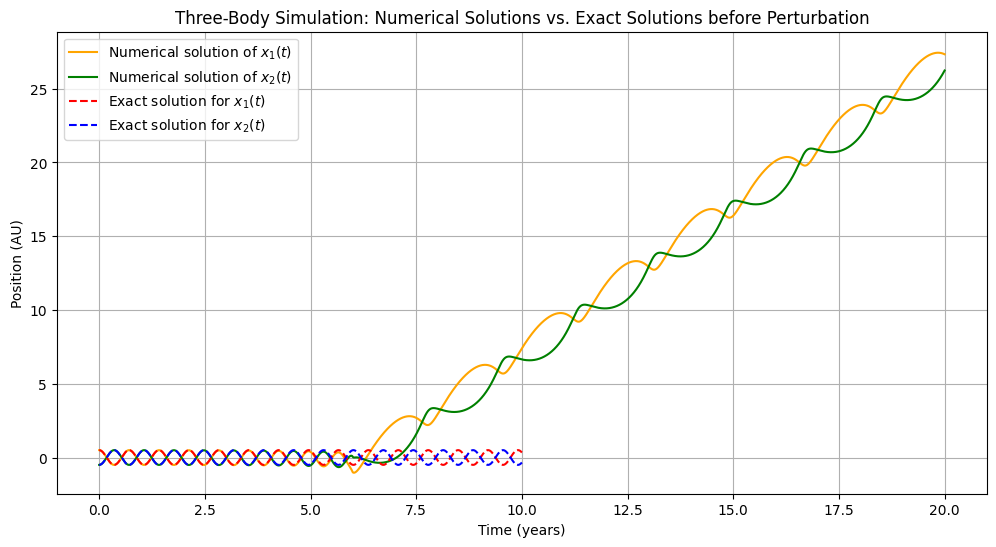

In [24]:
#Your code for Part (b) here
import numpy as np
import matplotlib.pyplot as plt
#Constants
G = 39.42
m1 = m2 = 1.0
m3 = 5.0
d = 1.0
t0 = 0
tf = 20
#Angular frequency
omega = np.sqrt(G*(m1 + m2)/d**3)

#Function to calculate gravitational acceleration
def accel(r):
    r1, r2, r3 = r[0:3], r[3:6], r[6:9]
    r12, r13, r21, r23, r31, r32 = r1 - r2, r1 - r3, r2 - r1, r2 - r3, r3 - r1, r3 - r2
    a1 = G *(m2 * r21 / np.linalg.norm(r21)**3 + m3 * r31 / np.linalg.norm(r31)**3)
    a2 = G * (m1 * r12 / np.linalg.norm(r12)**3 + m3 * r32 / np.linalg.norm(r32)**3)
    a3 = G * (m1 * r13 / np.linalg.norm(r13)**3 + m2 * r23 / np.linalg.norm(r23)**3)
    return np.concatenate([a1, a2, a3])

#Leapfrog method for three bodies
def leapfrog(num_steps):
    t = np.linspace(t0, tf, num=num_steps + 1)
    h = (tf - t0) / num_steps
    r = np.zeros((num_steps + 1, 9))  # Positions of the three bodies
    v = np.zeros((num_steps + 1, 9))  # Velocities of the three bodies

    # Initial conditions for the stars and black hole
    r[0] = [d/2, 0, 0, -d/2, 0, 0, -300, 0.5, 0.5]
    v[0] = [0, np.sqrt(G * (m1 + m2) / d) / 2, 0, 0, -np.sqrt(G * (m1 + m2) / d) / 2, 0, 50, 0, 0]

    for i in range(num_steps):
        v_half = v[i] + 0.5 * h * accel(r[i])  # First half kick
        r[i+1] = r[i] + h * v_half             # Drift
        v[i+1] = v_half + 0.5 * h * accel(r[i+1])  # Second half kick

    return r, v

num_steps = 10000
r, v = leapfrog(num_steps)

#Time step
t = np.linspace(t0, tf, num=num_steps + 1)

#Numerical results
x1_numerical = r[:, 0]
x2_numerical = r[:, 3]

#Plotting the numerical solutions for x1 and x2
plt.figure(figsize=(12, 6))
plt.plot(t, x1_numerical, label='Numerical solution of $x_1(t)$', color='orange')
plt.plot(t, x2_numerical, label='Numerical solution of $x_2(t)$', color='green')

#Time step before perturbation
t_exact = np.linspace(t0, tf/2, num=num_steps // 2 + 1)
plt.plot(t_exact, d/2 * np.cos(omega*t_exact), 'r--', label='Exact solution for $x_1(t)$')
plt.plot(t_exact, -d/2 * np.cos(omega*t_exact), 'b--', label='Exact solution for $x_2(t)$')

plt.xlabel('Time (years)')
plt.ylabel('Position (AU)')
plt.legend()
plt.title('Three-Body Simulation: Numerical Solutions vs. Exact Solutions before Perturbation')
plt.grid(True)
plt.show()



## <font color=#46769B>Part (c): Animating your N-body simulation</font>

Next, we will use a package called `celluloid` to make an animation of your $N$-body simulation.     
The basic idea of `celluloid` is that you make a series of plots, take a snapshot of each one, and then each snapshot becomes a frame in an animation. Here the points will represent the $(x,y)$ coordinates of the three masses.

If you are running your code in Colab, you need to uncomment the second line `!pip install celluloid`.

Your task is to take your results from Part (b) and run the following cell to make an animation. You should be able to run the code below as is to create a little movie in your Colab notebook.

Next, modify the code below to subtract out the center-of-mass motion of the binary stars. If done correctly, the binary pair will stay centered in the movie throughout, even after the disruption.

In [14]:
# Uncomment this next line in Google Colab
!pip install celluloid
from celluloid import Camera
from IPython.display import HTML

fig = plt.figure(figsize=(8,8))
camera = Camera(fig)

plt.xlim([-10,10])
plt.ylim([-10,10])

skip = 10 # Only includes every 10th time step
num_steps = len(t)-1 # Number of time steps

for i in range(0,num_steps,skip):
    x1, y1 = r[i,0], r[i,1]
    x2, y2 = r[i,3], r[i,4]
    x3, y3 = r[i,6], r[i,7]

    xcm = (x1+ x2)/2
    ycm = (y1+y2)/2

    # Plot (x,y) position for m1 at time ti
    plt.plot(x1-xcm,y1-ycm,'r.')

    # Plot (x,y) position for m1 at time ti
    plt.plot(x2-xcm,y2-ycm,'r.')

    # Plot (x,y) position for m3 (BH) at time ti
    plt.plot(x3-xcm,y3-ycm,'ko')

    camera.snap()


animation = camera.animate(interval=20)
plt.close()

HTML(animation.to_html5_video())

# Saving a video (uncomment this line)
# animation.save('n_body_motions.mp4')

## <font color=#46769B>Part (d): Disruption</font>

Your result from Parts (b) and (c) should suggest that the binary pair remains bound even after the disruption. The goal here is to determine the minimum BH mass that will cause the binary pair to become unbound.

It is helpful to have a quantitative test to measure whether the binary pair is bound or unbound at the end of the simulation. You will compute the energy $E = T + U$ for the two stars in their center-of-mass frame at the final time $t_f$.

- The potential energy for the stars is

$$U = - \frac{G m^2}{|\mathbf{r}_{12}|} \, .$$

- The *relative* kinetic energy of the stars (i.e., not including their overall center-of-mass motion) is
    
$$T = \frac{1}{2} \frac{m_1 m_2}{m_1 + m_2} |\mathbf{v}_1 - \mathbf{v}_2|^2 \, .$$

If $E < 0$, the system is *bound*. If $E > 0$, the system is *unbound*.

Your task is to repeat your simulations for a range of BH masses $m_3$ to determine (approximately) what value of $m_3$ will unbind the binary pair.

In [23]:
# Your code here for Part (d)
import numpy as np
import matplotlib.pyplot as plt

#Constants
G = 39.42
m1, m2, m3 = 1, 1, 5
d = 1
t0, tf = 0, 20
omega = 2 * np.pi

#Function for acceleration
def accel(r):
    r1, r2, r3 = r[0:3], r[3:6], r[6:9]
    r12, r13, r21, r23, r31, r32 = r1 - r2, r1 - r3, r2 - r1, r2 - r3, r3 - r1, r3 - r2
    a1 = G * (m2 * r21 / np.linalg.norm(r21)**3 + m3 * r31 / np.linalg.norm(r31)**3)
    a2 = G * (m1 * r12 / np.linalg.norm(r12)**3 + m3 * r32 / np.linalg.norm(r32)**3)
    a3 = G * (m1 * r13 / np.linalg.norm(r13)**3 + m2 * r23 / np.linalg.norm(r23)**3)
    return np.concatenate([a1, a2, a3])


#Leapfrog method for three bodies
def leapfrog(num_steps):
    t = np.linspace(t0, tf, num=num_steps + 1)
    h = (tf - t0) / num_steps
    r = np.zeros((num_steps + 1, 9))
    v = np.zeros((num_steps + 1, 9))

    #Initial conditions
    r[0] = [d/2, 0, 0, -d/2, 0, 0, -300, 0.5, 0.5]
    v[0] = [0, np.sqrt(G*(m1 + m2)/d)/ 2, 0, 0, -np.sqrt(G*(m1+m2)/d)/ 2, 0, 50, 0, 0]

    for i in range(num_steps):
        v_half = v[i] + 0.5 * h * accel(r[i])  # First half kick
        r[i+1] = r[i] + h * v_half             # Drift
        v[i+1] = v_half + 0.5 * h * accel(r[i+1])  # Second half kick

    return t, r, v

#Define energy function
def energy(r1, r2, v1, v2):
    v12 = v1 - v2
    v12_mag = np.linalg.norm(v12)
    r12 = r1 - r2
    r12_mag = np.linalg.norm(r12)

    U = -G / r12_mag
    T = 0.25 * v12_mag

    return T + U

mass = np.linspace(0, 10, 15)
for i in range(15):
    m3 = mass[i]
    t, r, v = leapfrog(5000)
    r1, r2 = r[-1, 0:3], r[-1, 3:6]
    v1, v2 = v[-1, 0:3], v[-1, 3:6]
    E = energy(r1, r2, v1, v2)
    if E < 0:
        print(f'Binary pair is still bound when black hole mass is {mass[i]}')
    else:
        print(f'Binary pair is unbound when black hole mass is {mass[i]}')


Binary pair is still bound when black hole mass is 0.0
Binary pair is still bound when black hole mass is 0.7142857142857143
Binary pair is still bound when black hole mass is 1.4285714285714286
Binary pair is still bound when black hole mass is 2.142857142857143
Binary pair is still bound when black hole mass is 2.857142857142857
Binary pair is still bound when black hole mass is 3.5714285714285716
Binary pair is still bound when black hole mass is 4.285714285714286
Binary pair is still bound when black hole mass is 5.0
Binary pair is still bound when black hole mass is 5.714285714285714
Binary pair is still bound when black hole mass is 6.428571428571429
Binary pair is still bound when black hole mass is 7.142857142857143
Binary pair is still bound when black hole mass is 7.857142857142858
Binary pair is unbound when black hole mass is 8.571428571428571
Binary pair is unbound when black hole mass is 9.285714285714286
Binary pair is unbound when black hole mass is 10.0
